In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import random
import unicodedata
import codecs
import itertools
import glob
import math
import sys
import time
import torch.optim.lr_scheduler as lr_scheduler

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"Current GPU: {gpu_name}")
else:
    print("No GPU available")


Current GPU: Tesla P100-PCIE-16GB


In [4]:
line_filepath = os.path.join('/kaggle/input/cornell-moviedialog-corpus', 'movie_lines.txt')
conv_filepath = os.path.join('/kaggle/input/cornell-moviedialog-corpus', 'movie_conversations.txt')

In [5]:
with open(line_filepath,'r' , encoding='ISO-8859-1') as file:
  lines = file.readlines()
for line in lines[:8]:
  print(line.strip())

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!
L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.
L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?
L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.
L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow
L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.
L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No


In [6]:
line_fileds = ["lineID","characterID","movieID","character","text"]
lines = {}
with open(line_filepath, 'r' ,encoding = 'ISO-8859-1') as f:
  for line in f:
    value = line.split(" +++$+++ ")
    lineobj = {}
    for i,field in enumerate(line_fileds):
      lineobj[field] = value[i]
    lines[lineobj['lineID']] = lineobj

In [7]:
with open(conv_filepath,'r' , encoding='ISO-8859-1') as file:
  lines1 = file.readlines()
for line in lines1[:8]:
  print(line.strip())

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']


In [8]:
# lines

In [9]:
conv_fileds = ["characterID","character2ID","movieID","utternceIDs"]
conversations = []
with open(conv_filepath, 'r' ,encoding = 'ISO-8859-1') as f:
  for line in f:
    value = line.split(" +++$+++ ")
    convobj = {}
    for i,field in enumerate(conv_fileds):
      convobj[field] = value[i]
    lineids = eval(convobj["utternceIDs"])
    convobj["lines"] = []
    for lineid in lineids:
      convobj["lines"].append(lines[lineid])
    conversations.append(convobj)

In [10]:
conversations[0]

{'characterID': 'u0',
 'character2ID': 'u2',
 'movieID': 'm0',
 'utternceIDs': "['L194', 'L195', 'L196', 'L197']\n",
 'lines': [{'lineID': 'L194',
   'characterID': 'u0',
   'movieID': 'm0',
   'character': 'BIANCA',
   'text': 'Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.\n'},
  {'lineID': 'L195',
   'characterID': 'u2',
   'movieID': 'm0',
   'character': 'CAMERON',
   'text': "Well, I thought we'd start with pronunciation, if that's okay with you.\n"},
  {'lineID': 'L196',
   'characterID': 'u0',
   'movieID': 'm0',
   'character': 'BIANCA',
   'text': 'Not the hacking and gagging and spitting part.  Please.\n'},
  {'lineID': 'L197',
   'characterID': 'u2',
   'movieID': 'm0',
   'character': 'CAMERON',
   'text': "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?\n"}]}

In [11]:
qa_pairs = []
for conversation in conversations:
  for i in range(len(conversation['lines']) - 1):
    inputline = conversation['lines'][i]['text'].strip()
    targetline = conversation['lines'][i+1]['text'].strip()

    if inputline and targetline:
      qa_pairs.append([inputline,targetline])


In [12]:
qa_pairs[0]

['Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.',
 "Well, I thought we'd start with pronunciation, if that's okay with you."]

In [13]:
datafile = os.path.join("/kaggle/working/","formatted_movie_lines.txt")
delimiter = '\t'

delimiter = str(codecs.decode(delimiter,"unicode_escape"))
with open(datafile,'w',encoding = 'utf-8') as outputfile:
  writer = csv.writer(outputfile,delimiter = delimiter)
  for pair in qa_pairs:
    writer.writerow(pair)
print("done")

done


In [14]:
with open(datafile,'r' , encoding='ISO-8859-1') as file:
  lines2 = file.readlines()
for line in lines2[:8]:
  print(line.strip())

Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.	Well, I thought we'd start with pronunciation, if that's okay with you.
Well, I thought we'd start with pronunciation, if that's okay with you.	Not the hacking and gagging and spitting part.  Please.
Not the hacking and gagging and spitting part.  Please.	Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?
You're asking me out.  That's so cute. What's your name again?	Forget it.
No, no, it's my fault -- we didn't have a proper introduction ---	Cameron.
Cameron.	The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.
The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.	Seems like she could get a date easy enough...
Why?	Unsolved mystery.  She used to be really popular when she started high sch

In [16]:
PAD_token = 0
SOS_token = 1
EOS_token = 2

class vocabulary:
  def __init__(self,name):
    self.name = name
    self.word2index = {}
    self.word2count = {}
    self.index2word = {PAD_token:"PAD",SOS_token:"SOS",EOS_token:"EOS"}
    self.num_words = 3

  def addsentence(self,sentence):
    for word in sentence.split(' '):
      self.addword(word)

  def addword(self,word):
    if word not in self.word2index:
      self.word2index[word] = self.num_words
      self.word2count[word] = 1
      self.index2word[self.num_words] = word
      self.num_words += 1

    else:
      self.word2count[word] += 1


  def trim(self,min_count):
    keep_words = []
    for k,v in self.word2count.items():
      if v >= min_count:
        keep_words.append(k)

    print(f'keep_words {len(keep_words)} , {len(self.word2index)} , {len(keep_words) / len(self.word2index)}')
    self.word2index = {}
    self.word2count = {}
    self.index2word = {PAD_token:"PAD",SOS_token:"SOS",EOS_token:"EOS"}
    self.num_words = 3

    for word in keep_words:
      self.addword(word)





In [17]:
def unicodeToAscii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn' )

In [18]:
def normalizestring(s):
  s = unicodeToAscii(s.lower().strip())

  s = re.sub(r"([.!?])",r" \1",s)
  s = re.sub(r"[^a-zA-Z.!?]+" ,r" ",s)
  s = re.sub(r"\s+",r" ",s).strip()

  return s

In [19]:
normalizestring("4how to 5+7 is?")

'how to is ?'

In [20]:
datafile = os.path.join("/kaggle/working/","formatted_movie_lines.txt")
lines3 = open(datafile ,encoding = "utf-8").read().strip().split('\n')
pairs = [[normalizestring(s) for s in pair.split('\t')] for pair in lines3]
vocabulary1 = vocabulary("cornell movie-dialogs")

In [21]:
len(pairs)

221282

In [24]:
lengths1 = [len(pair[0].split(" ")) for pair in pairs]
lengths2 = [len(pair[1].split(" ")) for pair in pairs]

print(max(lengths1),max(lengths2))

380 684


In [30]:
MAX_LENGTH = 30
def filterPair(p):
  return len(p[0].split()) < MAX_LENGTH and len(p[1].split()) < MAX_LENGTH

def filterPairs(pairs):
  return [pair for pair in pairs if filterPair(pair)]


In [31]:
filterPair(pairs[0])

True

In [32]:
pairs = filterPairs(pairs)
print(len(pairs))

184550


In [33]:
for pair in pairs:
  vocabulary1.addsentence(pair[0])
  vocabulary1.addsentence(pair[1])

print(f"word count : {vocabulary1.num_words}")

for pair in pairs[:10]:
  print(pair)

word count : 40151
['can we make this quick ? roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad . again .', 'well i thought we d start with pronunciation if that s okay with you .']
['well i thought we d start with pronunciation if that s okay with you .', 'not the hacking and gagging and spitting part . please .']
['not the hacking and gagging and spitting part . please .', 'okay . . . then how bout we try out some french cuisine . saturday ? night ?']
['you re asking me out . that s so cute . what s your name again ?', 'forget it .']
['no no it s my fault we didn t have a proper introduction', 'cameron .']
['cameron .', 'the thing is cameron i m at the mercy of a particularly hideous breed of loser . my sister . i can t date until she does .']
['the thing is cameron i m at the mercy of a particularly hideous breed of loser . my sister . i can t date until she does .', 'seems like she could get a date easy enough . . .']
['why ?', 'unso

In [34]:
next(iter(vocabulary1.word2count.items()))

('can', 16303)

In [35]:
MIN_COUNT = 3
def trimRareWords(voc,pairs,MIN_COUNT):
  voc.trim(MIN_COUNT)
  keep_pairs = []

  for pair in pairs:
    inputsentence = pair[0]
    replysentece = pair[1]

    keepinput = True
    keepreply = True

    for word in inputsentence.split(' '):
      if word not in vocabulary1.word2index:
        keepinput = False
        break

    for word in replysentece.split(' '):
      if word not in vocabulary1.word2index:
        keepreply = False
        break

    if keepinput and keepreply:
      keep_pairs.append(pair)


  print(f'trimed from {len(pairs)} to {len(keep_pairs)} ,ratio is  = {len(keep_pairs) / len(pairs) }')
  return keep_pairs




In [36]:
pairs = trimRareWords(vocabulary1,pairs,MIN_COUNT)

keep_words 21855 , 40148 , 0.5443608648002392
trimed from 184550 to 163084 ,ratio is  = 0.8836846383094012


In [37]:
next(iter(vocabulary1.word2count.items()))

('can', 1)

In [38]:
def indexesFromsentence(voc,sentence):
  return [voc.word2index[word] for word in sentence.split(' ')] + [EOS_token]

In [39]:
pairs[2][0]

'no no it s my fault we didn t have a proper introduction'

In [40]:
indexesFromsentence(vocabulary1, pairs[2][0])

[61, 61, 60, 32, 62, 63, 4, 64, 65, 66, 67, 68, 69, 2]

In [41]:
def zeropadding(l,fillvalue = 0):
  return list(itertools.zip_longest(*l,fillvalue = fillvalue))

In [42]:
def binaryMatrix(l,value = 0):

  m = []
  for i,seq in enumerate(l):
    m.append([])
    for token in seq:
      if token  == PAD_token:
        m[i].append(0)
      else:
        m[i].append(1)

  return m

In [43]:
def inputVar(l,voc):
  index_batch = [indexesFromsentence(voc,sentence) for sentence in l]
  lenghts = torch.tensor([len(index) for index in index_batch])
  padList = zeropadding(index_batch)
  padVar = torch.LongTensor(padList)
  return padVar,lenghts


In [44]:
def outputVar(l,voc):

  index_batch = [indexesFromsentence(voc,sentence) for sentence in l]
  max_target_len = max([len(index) for index in index_batch])
  padList = zeropadding(index_batch)
  mask = binaryMatrix(padList)
  mask = torch.BoolTensor(mask)
  padVar = torch.LongTensor(padList)

  return padVar, mask ,max_target_len

In [45]:
def batch2TrainData(voc,pair_batch):
  pair_batch.sort(key = lambda x: len(x[0].split(" ")), reverse = True)
  input_batch = []
  output_batch = []
  for pair in pair_batch:
    input_batch.append(pair[0])
    output_batch.append(pair[1])
  input, lenght = inputVar(input_batch,voc)
  output, mask ,max_target_len = outputVar(output_batch,voc)
  return input,lenght ,output ,mask ,max_target_len

In [46]:
inp1,len1,out1,mas1, max1 = batch2TrainData(vocabulary1,pairs[:10])

In [50]:
inp1.shape

torch.Size([29, 10])

In [48]:
class EncoderRNN(nn.Module):
  def __init__(self,hidden_size,embedding,n_layers = 1, dropout = 0):
    super(EncoderRNN,self).__init__()
    self.n_layers = n_layers
    self.hidden_size = hidden_size
    self.embedding = embedding
    self.gru = nn.GRU(hidden_size,hidden_size,n_layers,dropout = (0 if n_layers == 1 else dropout), bidirectional = True)

  def forward(self,input_seq,input_lengths, hidden = None):
    embedded = self.embedding(input_seq)
    packed = torch.nn.utils.rnn.pack_padded_sequence(embedded ,input_lengths)
    outputs,hidden = self.gru(packed,hidden)
    outputs,_ = torch.nn.utils.rnn.pad_packed_sequence(outputs)
    outputs = outputs[:,:,:self.hidden_size] + outputs[:,:,self.hidden_size:]
    return outputs,hidden

In [41]:
class Attn(nn.Module):
  def __init__(self,method,hidden_size):
    super(Attn,self).__init__()
    self.method = method
    self.hidden_size = hidden_size

  def dot_score(self,hidden,encoder_output):
    return torch.sum(hidden*encoder_output,dim = 2)

  def forward(self,hidden,encoder_outputs):

    attn_energies = self.dot_score(hidden,encoder_outputs)

    attn_energies = attn_energies.t()

    return F.softmax(attn_energies,dim = 1).unsqueeze(1)

In [42]:
class LuongAttDecorderRNN(nn.Module):
  def __init__(self,attn_model,embeddings,hidden_size,output_size,n_layers = 1,dropout = 0.1):
    super(LuongAttDecorderRNN,self).__init__()

    self.attn = Attn(attn_model,hidden_size)
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    self.dropout = dropout

    self.embedding = embeddings
    self.embedding_dropout = nn.Dropout(dropout)
    self.gru = nn.GRU(hidden_size,hidden_size,n_layers,dropout = (0 if n_layers == 1 else dropout))
    self.concat = nn.Linear(2*hidden_size,hidden_size)
    self.out = nn.Linear(hidden_size,output_size)

  def forward(self,input_step,last_hidden,encoder_outputs):
    embedded = self.embedding(input_step)
    embedded = self.embedding_dropout(embedded)
    rnn_output,hidden = self.gru(embedded,last_hidden)
    # rnn_output = rnn_output[:, :, :self.hidden_size] + rnn_output[:, :, self.hidden_size:]
    attn_weights = self.attn(rnn_output,encoder_outputs)
    context = attn_weights.bmm(encoder_outputs.transpose(0,1)) # we check how much of encoder outputs sutable by multi ply it with weights of attention. if there are more feature those are mutiply each one by one
    rnn_output = rnn_output.squeeze(0)
    context = context.squeeze(1)
    concat_input = torch.cat((rnn_output,context),1)
    concat_output = torch.tanh(self.concat(concat_input))
    output = self.out(concat_output)
    output = F.softmax(output,dim = 1)

    return output,hidden


In [43]:
def maskkNLLoss(decoder_out,target,mask):
  nTotal = mask.sum()
  target = target.view(-1,1)
  gathered_tensor = torch.gather(decoder_out,1,target)
  crossentropy = -torch.log(gathered_tensor)
  loss = crossentropy.masked_select(mask)
  loss = loss.mean()
  loss = loss.to(device)

  return loss,nTotal.item()

In [44]:
# small_batch_size = 5
# batches = batch2TrainData(vocabulary1,[random.choice(pairs) for i in range(small_batch_size) ])
# input_variables,lengths,target_variables,mask,max_target_len = batches


# print(f"input variable shape : {input_variables.shape}")
# print(f"lenght shape : {lengths.shape}")
# print(f"target_variable shape : {target_variables.shape}")
# print(f"mask shape : {mask.shape}")
# print(f"max_target_len : {max_target_len}")

In [45]:
hidden_size = 500
encoder_n_layer = 2
decoder_n_layer = 2
dropout = 0.1
attn_model = 'dot'
embedding = nn.Embedding(vocabulary1.num_words,hidden_size)

encoder = EncoderRNN(hidden_size,embedding,encoder_n_layer,dropout)
decoder = LuongAttDecorderRNN(attn_model,embedding,hidden_size,vocabulary1.num_words,decoder_n_layer,dropout)

encoder.to(device)
decoder.to(device)

encoder.train()
decoder.train()

encoder_optimizer = optim.Adam(encoder.parameters(),lr = 0.001)
decoder_optimizer = optim.Adam(decoder.parameters(),lr = 0.001)
encoder_optimizer.zero_grad()
decoder_optimizer.zero_grad()
#-----
# input_variable = input_variables.to(device)
# lengths = lengths.to(device)
# target_variable = target_variables.to(device)
# mask = mask.to(device)

# loss = 0
# print_losses = []
# n_totals = 0


In [46]:
# print(f"Actual input lengths: {lengths}")
# encoder_outputs,encoder_hidden = encoder(input_variables,lengths)
# print(f"Encoder Outputs Shape : {encoder_outputs.shape}")
# print(f"Last Encoder Hidden Shape: {encoder_hidden.shape}")

In [47]:
# decoder_input = torch.LongTensor([[SOS_token for i in range(small_batch_size)]])
# decoder_input = decoder_input.to(device)
# print(f"Initial Decoder input shape : {decoder_input.shape}")
# print(decoder_input)

# decoder_hidden = encoder_hidden[:decoder.n_layers]
# print(f"Initial Decoder hidden state shape : {decoder_hidden.shape}")


In [48]:
# for t in range(max_target_len):
#   decoder_output,decoder_hidden = decoder(decoder_input,decoder_hidden,encoder_outputs)
#   print(f"decoder output : {decoder_output.shape}")
#   print(f"decoder hidden : {decoder_hidden.shape}")

#   decoder_input = target_variable[t].view(1,-1)

#   print(f"target variable befor reshaping : {target_variable[t]}")
#   print(f"target variable shapw befor reshaping : {target_variable[t].shape}")
#   print(f"decoder input shape : {decoder_input.shape}")
#   print(f"decoder input : {decoder_input}")

#   print("\n")




In [49]:
directory = os.path.join ("/kaggle/working/", '{}-{}_{}'.format(2, 2, 500))

In [50]:
# if not os.path.exists(directory):
#   os.makedirs(directory)

In [51]:
def savecurrentstates(directory,encoder,decoder,encoder_optimizer,decoder_optimizer,embedding,voc,loss = torch.zeros(4000),accuracy = torch.zeros(4000) ,iteration = 0):
  """

  Args:
    encoder:
    decoder:
    encoder_optimizer:
    decoder_optimizer:
    embedding:
    voc:
    loss:
    iteration:
  """
  torch.save({
        'iteration': iteration,
        'en': encoder.state_dict(),
        'de': decoder.state_dict(),
        'en_opt': encoder_optimizer.state_dict(),
        'de_opt': decoder_optimizer.state_dict(),
        'loss': loss,
        'accuracy': accuracy,
        'embedding': embedding.state_dict(),
        'voc_dict': voc.__dict__,
    }, os.path.join(directory, '{}_{}.tar'.format(iteration, 'checkpoint')))

In [52]:
def loadcurrentstate(directory,map_location = None):
  checkpoints = glob.glob(os.path.join(directory, '*_checkpoint.tar'))
  
  if not checkpoints:
      return None
  latest_checkpoint = max(checkpoints, key=os.path.getctime)
  checkpoint = torch.load(latest_checkpoint,map_location=map_location)
  return checkpoint

In [53]:
if os.path.exists(directory):
  print("yes path exist")
else:
  print("no")

yes path exist


In [54]:
# savecurrentstates(directory,encoder,decoder,encoder_optimizer,decoder_optimizer,embedding,vocabulary1)

In [55]:
if not os.path.exists(directory):
  os.makedirs(directory)
  savecurrentstates(directory,encoder,decoder,encoder_optimizer,decoder_optimizer,embedding,vocabulary1)

In [56]:
if os.path.exists(directory):
  print("yes path exist")
else:
  print("no")

yes path exist


In [57]:
print(loadcurrentstate(directory,torch.device('cuda'))['loss'].shape)

torch.Size([4000])


In [58]:
num_params = sum(p.numel() for p in encoder.parameters())
print(f"Total number of parameters: {num_params}")

Total number of parameters: 11425000


In [59]:
num_params = sum(p.numel() for p in decoder.parameters())
print(f"Total number of parameters: {num_params}")

Total number of parameters: 11340326


In [60]:
def get_sampling_prob(epoch, cycle_length=150):
    return 0.25 * (math.cos(math.pi * epoch / cycle_length) + 1)

In [61]:
device

device(type='cuda')

In [62]:
len(pairs)

53165

In [74]:
def loadcurrentstate1(directory,map_location = None):
  checkpoints = glob.glob(os.path.join(directory, '2749_checkpoint.tar'))
  
  if not checkpoints:
      return None
  latest_checkpoint = max(checkpoints, key=os.path.getctime)
  checkpoint = torch.load(latest_checkpoint,map_location=map_location)
  return checkpoint

In [64]:
directory1 = "/kaggle/working/2-2_500/"

In [ ]:

fullloss = torch.zeros(4000)
accuracy = torch.zeros(4000)

latest_checkpoint = loadcurrentstate1(directory1,torch.device('cuda'))

encoder.load_state_dict(latest_checkpoint['en'])
decoder.load_state_dict(latest_checkpoint['de'])
encoder_optimizer.load_state_dict(latest_checkpoint['en_opt'])
decoder_optimizer.load_state_dict(latest_checkpoint['de_opt'])
for param_group in encoder_optimizer.param_groups:
    param_group['lr'] = 0.0005
for param_group in decoder_optimizer.param_groups:
    param_group['lr'] = 0.0005
embedding.load_state_dict(latest_checkpoint['embedding'])
start_epoc = latest_checkpoint['iteration']
fullloss = latest_checkpoint['loss']
accuracy = latest_checkpoint['accuracy']
vocabulary1.__dict__ = latest_checkpoint['voc_dict']
last_epoc = 4000
clip = 50.0

for epoc in range(start_epoc,last_epoc):
  t0 = time.time()
  batchloss = []
  batchacc = []
  start = 0
  end = 1600
  batch_size = 1600
  shuffled_pairs = random.sample(pairs,52800)
  while(end <= 52800):
    batch_pairs = shuffled_pairs[start:end]
    data,lengths,labels,mask,max_target_len = batch2TrainData(vocabulary1,batch_pairs)

    data = data.to(device)
    labels = labels.to(device)
    mask = mask.to(device)
    lengths = lengths.to("cpu")

    encoder_output,encoder_hidden = encoder(data,lengths)
    decoder_hidden = encoder_hidden[:decoder.n_layers]
    decoder_hidden = decoder_hidden.to(device)
    decoder_input = torch.LongTensor([[SOS_token for i in range(batch_size)]])
    decoder_input = decoder_input.to(device)
    loss = 0
    if random.random() < 0.4:
        for t in range(max_target_len):
          decoder_output,decoder_hidden = decoder(decoder_input,decoder_hidden,encoder_output)
          decoder_input = labels[t].view(1,-1)
          masked_loss,ntotal = maskkNLLoss(decoder_output, labels[t], mask[t])
          loss = loss + masked_loss
          
    else:
        for t in range(max_target_len):
          decoder_output,decoder_hidden = decoder(decoder_input,decoder_hidden,encoder_output)
          topvalues,topindex = decoder_output.topk(1)
          decoder_input = torch.LongTensor([[topindex[i][0] for i in range(batch_size)]])
          decoder_input = decoder_input.to(device)
          masked_loss,ntotal = maskkNLLoss(decoder_output, labels[t], mask[t])
          loss = loss + masked_loss

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    loss.backward()

    _ = nn.utils.clip_grad_norm_(encoder.parameters(), clip)
    _ = nn.utils.clip_grad_norm_(decoder.parameters(), clip)

    encoder_optimizer.step()
    decoder_optimizer.step()

    batchloss.append(loss.item())

#     with torch.no_grad():
#       values = torch.zeros(max_target_len,batch_size,device = device).long()
#       for t in range(max_target_len):
#         decoder_output,decoder_hidden = decoder(decoder_input,decoder_hidden,encoder_output)
#         topvalues,topindex = decoder_output.topk(1)
#         decoder_input = torch.LongTensor([[topindex[i][0] for i in range(batch_size)]])
#         decoder_input = decoder_input.to(device)
#         values[t] = decoder_input

#       matches = (values ==  labels)
#       matchesNumeric = matches.float()
#       accuracyPct = 100*torch.mean(matchesNumeric)
#       batchacc.append( accuracyPct.item() )
    start = start + batch_size
    end = end + batch_size

  fullloss[epoc] =  np.mean(batchloss)
#   accuracy[epoc] = np.mean(batchacc)

  if (epoc + 1) % 250 == 0:
    savecurrentstates(directory,encoder,decoder,encoder_optimizer,decoder_optimizer,embedding,vocabulary1,fullloss,accuracy,epoc)

  t1 = time.time()
  sys.stdout.write(f"\rEpoc count is {epoc + 1}/{last_epoc} --- currentloss is : {fullloss[epoc]} --- time: {t1-t0}")
  sys.stdout.flush()



In [66]:
encoder.train()
decoder.train()

LuongAttDecorderRNN(
  (attn): Attn()
  (embedding): Embedding(7826, 500)
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (gru): GRU(500, 500, num_layers=2, dropout=0.1)
  (concat): Linear(in_features=1000, out_features=500, bias=True)
  (out): Linear(in_features=500, out_features=7826, bias=True)
)

In [67]:
# def evaluate(encoder, decoder, voc, sentence, max_length=10):
    
#     encoder.eval()
#     decoder.eval()
    
    
#     input_sentence = normalizestring(sentence)
#     input_indexes = indexesFromsentence(voc, input_sentence)
#     input_tensor = torch.LongTensor(input_indexes).unsqueeze(1).to(device)
#     input_length = torch.LongTensor([len(input_indexes)])
    
    
#     decoder_input = torch.LongTensor([[SOS_token]]).to(device)
    
    
#     all_tokens = torch.zeros([0], device=device, dtype=torch.long)
#     all_scores = torch.zeros([0], device=device)
    
    
#     with torch.no_grad():
#         encoder_outputs, encoder_hidden = encoder(input_tensor, input_length)
    
    
#     decoder_hidden = encoder_hidden[:decoder.n_layers]
    
    
#     for _ in range(max_length):
#         with torch.no_grad():
#             decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden, encoder_outputs)
        
        
#         decoder_scores, decoder_input = decoder_output.max(1)
        
        
#         all_tokens = torch.cat((all_tokens, decoder_input), dim=0)
#         all_scores = torch.cat((all_scores, decoder_scores), dim=0)
        
        
#         decoder_input = torch.unsqueeze(decoder_input, 0)
        
        
#         if decoder_input.item() == EOS_token:
#             break
    
    
#     decoded_words = [voc.index2word[token.item()] for token in all_tokens]
    
    
#     if 'EOS' in decoded_words:
#         decoded_words = decoded_words[:decoded_words.index('EOS')]
    
#     return ' '.join(decoded_words)


# def chat_with_model(encoder, decoder, voc):
#     while True:
#         user_input = input("You: ")
#         if user_input.lower() == 'quit':
#             break
        
#         response = evaluate(encoder, decoder, voc, user_input)
#         print("Bot:", response)


# latest_checkpoint = loadcurrentstate1(directory1, torch.device('cpu'))
# encoder.load_state_dict(latest_checkpoint['en'])
# decoder.load_state_dict(latest_checkpoint['de'])
# vocabulary1.__dict__ = latest_checkpoint['voc_dict']



# encoder.eval()
# decoder.eval()

# print(latest_checkpoint['iteration'])

In [68]:

# print("Chat with the model (type 'quit' to exit):")
# chat_with_model(encoder, decoder, vocabulary1)

In [69]:
# os.remove("/kaggle/working/file_name.csv")

In [75]:
# os.remove("/kaggle/working/2-2_500/2999_checkpoint.tar")

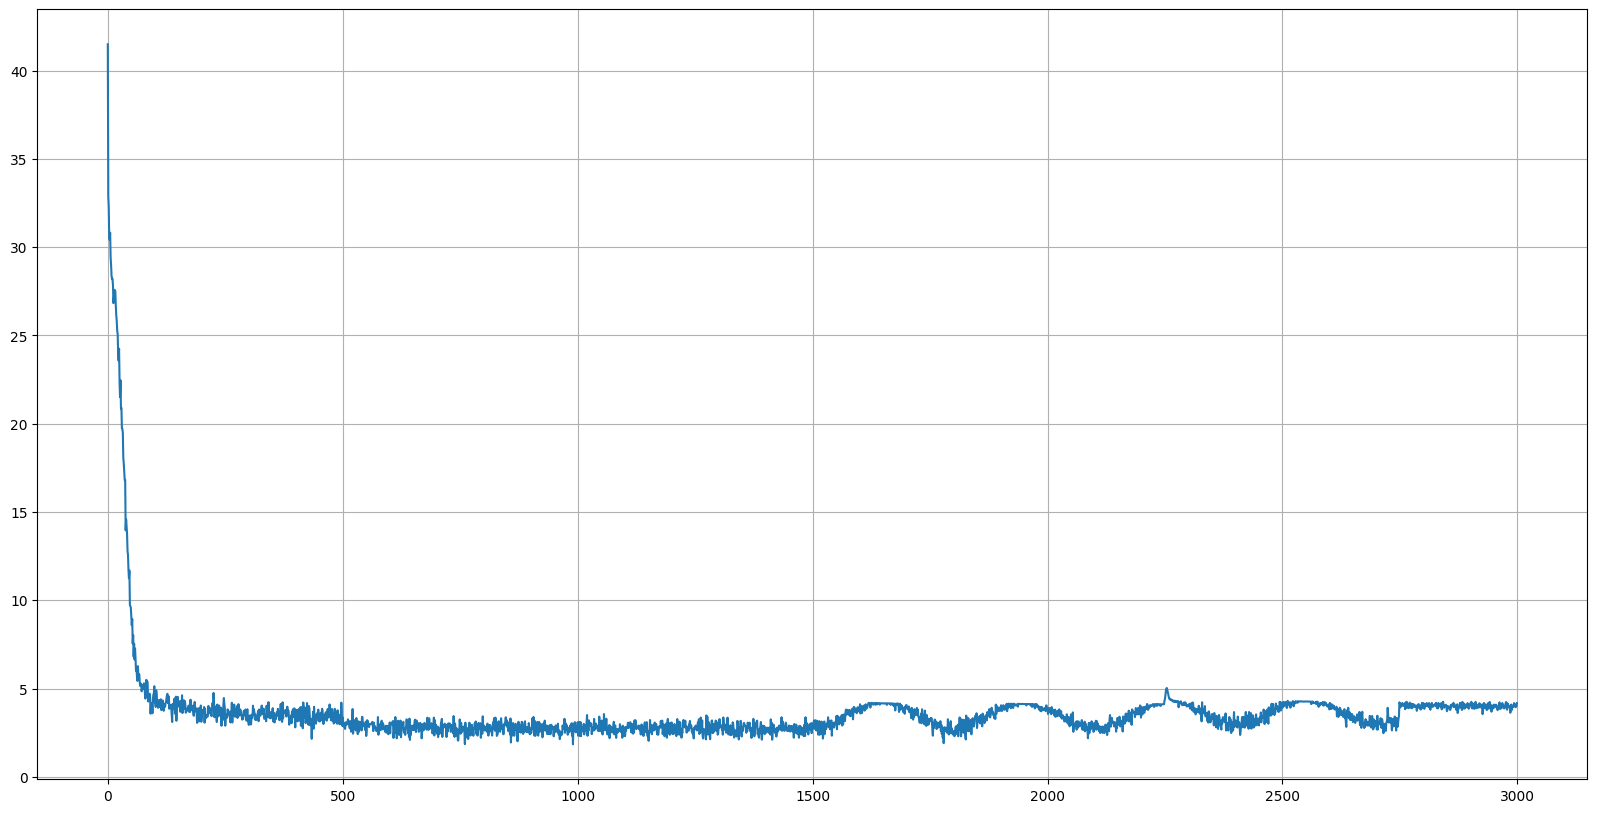

In [72]:
latest_checkpoint = loadcurrentstate1(directory1, torch.device('cpu'))
t_1 = latest_checkpoint['loss'][:3000]
plt.figure(figsize = (20,10))
plt.grid()
plt.plot(t_1)